In [1]:
import sys
import shap
import numpy as np
import pandas as pd
from pathlib import Path

from IPython.display import display

main_path = Path().absolute().parent
sys.path.append(str(main_path))
shap.initjs()

In [2]:
from fge.tree_builder import TreeBuilder
from CAhousing import build_model

results = build_model(seed=8, eta=0.3, max_depth=8, subsample=1.0, num_rounds=200)

[0]	test-rmse:1.43881
[20]	test-rmse:0.47593
[40]	test-rmse:0.46441
[60]	test-rmse:0.46037
[80]	test-rmse:0.45844
[100]	test-rmse:0.45819
[120]	test-rmse:0.45695
[140]	test-rmse:0.45686
[160]	test-rmse:0.45652
[180]	test-rmse:0.45721
[199]	test-rmse:0.45819
# of train data: 18576
# of test data: 2064
R2 square: 0.8452950327375699


calculate all shap values + shape interaction values

In [3]:
model = results['model']
X_train, y_train = results['train']
X_test, y_test = results['test']

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)
shap_interaction_values = explainer.shap_interaction_values(X_test)

In [4]:
tree_builder = TreeBuilder()
# magnitude: whether to absolute the shap interaction values to store into values(not related with scores) 
# = only look at the size of values
magnitude = False 
top_n = 3

In [5]:
# check the difference with average shape values if using `magnitude` option

display(pd.DataFrame(shap_values.values.mean(0)[:, np.newaxis].T, columns=X_test.columns))
print(f'Sum of all averaged global shap values: {shap_values.values.mean(0).sum()}')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.004956,0.005497,-0.024868,0.007195,0.001947,0.011714,-0.046797,0.0223


Sum of all averaged global shap values: -0.027967434376478195


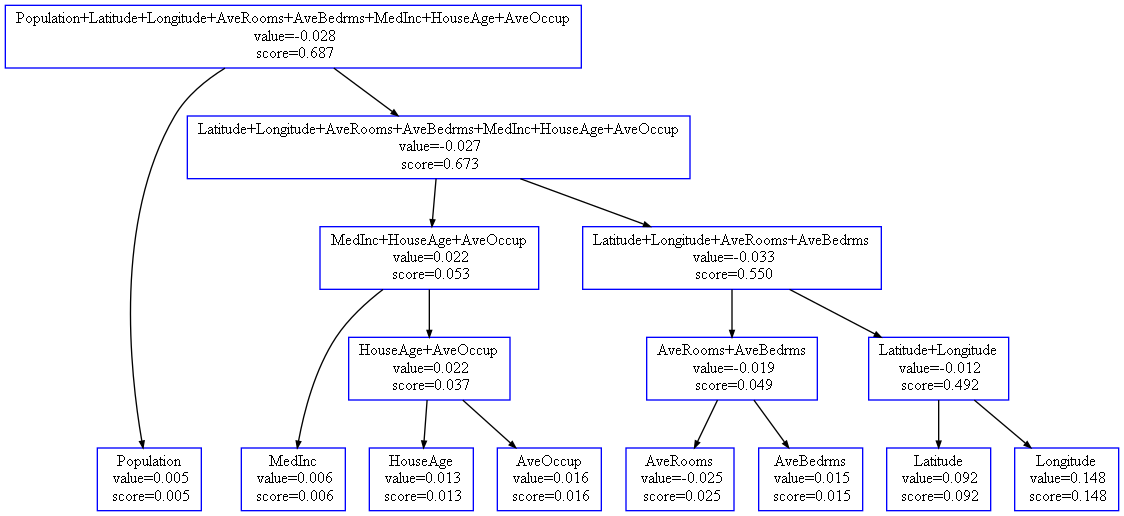

''

In [6]:
# global tree with 'base' method
nodes = tree_builder.build('base', 
    shap_interactions=shap_interaction_values, feature_names=X_test.columns, top_n=top_n, magnitude=magnitude)
tree_builder.show_tree(nodes)

In [8]:
G = tree_builder.show_tree(nodes, notebook=False)

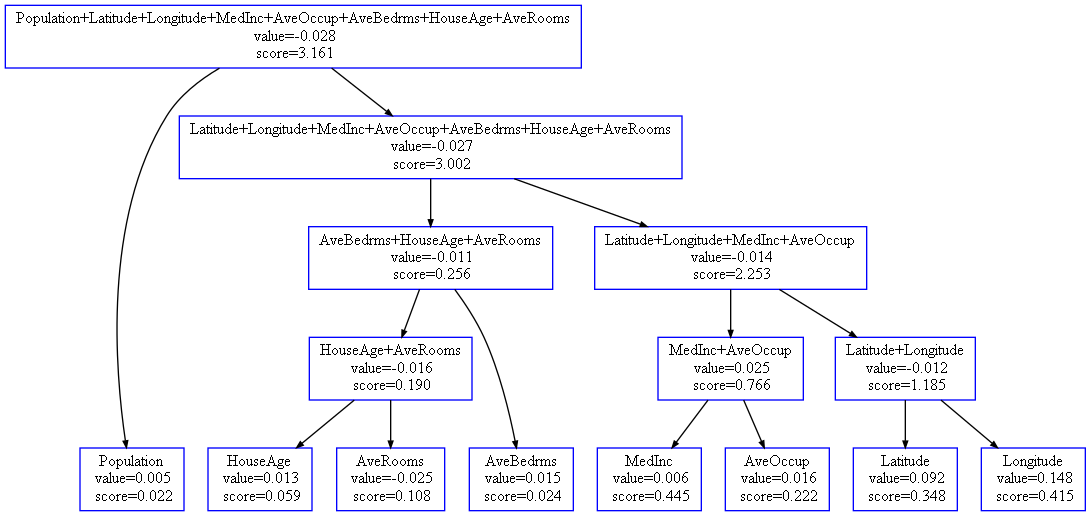

In [7]:
# global tree with 'abs' method
nodes = tree_builder.build('abs', 
    shap_interactions=shap_interaction_values, feature_names=X_test.columns, top_n=top_n, magnitude=magnitude)
tree_builder.show_tree(nodes)

In [8]:
# global tree with 'abs_interaction' method
nodes = tree_builder.build('abs_interaction', 
    shap_interactions=shap_interaction_values, feature_names=X_test.columns, top_n=top_n, magnitude=magnitude)
tree_builder

Population+Latitude+Longitude+MedInc+AveOccup+HouseAge+AveRooms+AveBedrms(v=-0.0280, s=1.5186)
├── Population(v=0.0052, s=0.0000)
└── Latitude+Longitude+MedInc+AveOccup+HouseAge+AveRooms+AveBedrms(v=-0.0266, s=1.3818)
    ├── Latitude+Longitude+MedInc+AveOccup(v=-0.0143, s=0.8238)
    │   ├── Latitude+Longitude(v=-0.0122, s=0.4229)
    │   │   ├── Latitude(v=0.0922, s=0.0000)
    │   │   └── Longitude(v=0.1477, s=0.0000)
    │   └── MedInc+AveOccup(v=0.0245, s=0.0992)
    │       ├── MedInc(v=0.0063, s=0.0000)
    │       └── AveOccup(v=0.0165, s=0.0000)
    └── HouseAge+AveRooms+AveBedrms(v=-0.0107, s=0.0649)
        ├── HouseAge(v=0.0130, s=0.0000)
        └── AveRooms+AveBedrms(v=-0.0189, s=0.0277)
            ├── AveRooms(v=-0.0250, s=0.0000)
            └── AveBedrms(v=0.0152, s=0.0000)

In [9]:
# global tree with 'ratio' method
nodes = tree_builder.build('ratio', 
    shap_interactions=shap_interaction_values, feature_names=X_test.columns, top_n=top_n, magnitude=magnitude)
tree_builder

MedInc+Latitude+Longitude+HouseAge+AveOccup+AveRooms+AveBedrms+Population(v=-0.0280, s=3.7037)
├── MedInc(v=0.0063, s=0.0000)
└── Latitude+Longitude+HouseAge+AveOccup+AveRooms+AveBedrms+Population(v=-0.0117, s=2.9799)
    ├── Latitude+Longitude+HouseAge+AveOccup(v=0.0109, s=1.1702)
    │   ├── Latitude+Longitude(v=-0.0122, s=0.5547)
    │   │   ├── Latitude(v=0.0922, s=0.0000)
    │   │   └── Longitude(v=0.1477, s=0.0000)
    │   └── HouseAge+AveOccup(v=0.0217, s=0.2406)
    │       ├── HouseAge(v=0.0130, s=0.0000)
    │       └── AveOccup(v=0.0165, s=0.0000)
    └── AveRooms+AveBedrms+Population(v=-0.0146, s=0.6306)
        ├── AveRooms(v=-0.0250, s=0.0000)
        └── AveBedrms+Population(v=0.0199, s=0.2734)
            ├── AveBedrms(v=0.0152, s=0.0000)
            └── Population(v=0.0052, s=0.0000)

with magnitude = True

In [10]:
# magnitude: whether to absolute the shap interaction values to store into values(not related with scores) 
# = only look at the size of values
magnitude = True

# global tree with 'base' method(magnitude=True)
nodes = tree_builder.build('base', 
    shap_interactions=shap_interaction_values, feature_names=X_test.columns, top_n=top_n, magnitude=magnitude)
tree_builder

Population+Latitude+Longitude+AveRooms+AveBedrms+MedInc+HouseAge+AveOccup(v=3.1610, s=0.6874)
├── Population(v=0.0217, s=0.0052)
└── Latitude+Longitude+AveRooms+AveBedrms+MedInc+HouseAge+AveOccup(v=3.0024, s=0.6729)
    ├── Latitude+Longitude+AveRooms+AveBedrms(v=1.4866, s=0.5505)
    │   ├── Latitude+Longitude(v=1.1855, s=0.4920)
    │   │   ├── Latitude(v=0.3476, s=0.0922)
    │   │   └── Longitude(v=0.4149, s=0.1477)
    │   └── AveRooms+AveBedrms(v=0.1599, s=0.0493)
    │       ├── AveRooms(v=0.1082, s=0.0250)
    │       └── AveBedrms(v=0.0240, s=0.0152)
    └── MedInc+HouseAge+AveOccup(v=0.9486, s=0.0527)
        ├── MedInc(v=0.4452, s=0.0063)
        └── HouseAge+AveOccup(v=0.3481, s=0.0372)
            ├── HouseAge(v=0.0587, s=0.0130)
            └── AveOccup(v=0.2220, s=0.0165)

In [11]:
# global tree with 'abs' method(magnitude=True)
nodes = tree_builder.build('abs', 
    shap_interactions=shap_interaction_values, feature_names=X_test.columns, top_n=top_n, magnitude=magnitude)
tree_builder

Population+Latitude+Longitude+MedInc+AveOccup+AveBedrms+HouseAge+AveRooms(v=3.1610, s=3.1610)
├── Population(v=0.0217, s=0.0217)
└── Latitude+Longitude+MedInc+AveOccup+AveBedrms+HouseAge+AveRooms(v=3.0024, s=3.0024)
    ├── Latitude+Longitude+MedInc+AveOccup(v=2.2535, s=2.2535)
    │   ├── Latitude+Longitude(v=1.1855, s=1.1855)
    │   │   ├── Latitude(v=0.3476, s=0.3476)
    │   │   └── Longitude(v=0.4149, s=0.4149)
    │   └── MedInc+AveOccup(v=0.7664, s=0.7664)
    │       ├── MedInc(v=0.4452, s=0.4452)
    │       └── AveOccup(v=0.2220, s=0.2220)
    └── AveBedrms+HouseAge+AveRooms(v=0.2558, s=0.2558)
        ├── AveBedrms(v=0.0240, s=0.0240)
        └── HouseAge+AveRooms(v=0.1897, s=0.1897)
            ├── HouseAge(v=0.0587, s=0.0587)
            └── AveRooms(v=0.1082, s=0.1082)

In [12]:
# global tree with 'abs_interaction' method(magnitude=True)
nodes = tree_builder.build('abs_interaction', 
    shap_interactions=shap_interaction_values, feature_names=X_test.columns, top_n=top_n, magnitude=magnitude)
tree_builder

Population+Latitude+Longitude+MedInc+AveOccup+HouseAge+AveRooms+AveBedrms(v=3.1610, s=1.5186)
├── Population(v=0.0217, s=0.0000)
└── Latitude+Longitude+MedInc+AveOccup+HouseAge+AveRooms+AveBedrms(v=3.0024, s=1.3818)
    ├── Latitude+Longitude+MedInc+AveOccup(v=2.2535, s=0.8238)
    │   ├── Latitude+Longitude(v=1.1855, s=0.4229)
    │   │   ├── Latitude(v=0.3476, s=0.0000)
    │   │   └── Longitude(v=0.4149, s=0.0000)
    │   └── MedInc+AveOccup(v=0.7664, s=0.0992)
    │       ├── MedInc(v=0.4452, s=0.0000)
    │       └── AveOccup(v=0.2220, s=0.0000)
    └── HouseAge+AveRooms+AveBedrms(v=0.2558, s=0.0649)
        ├── HouseAge(v=0.0587, s=0.0000)
        └── AveRooms+AveBedrms(v=0.1599, s=0.0277)
            ├── AveRooms(v=0.1082, s=0.0000)
            └── AveBedrms(v=0.0240, s=0.0000)

In [13]:
# global tree with 'ratio' method(magnitude=True)
nodes = tree_builder.build('ratio', 
    shap_interactions=shap_interaction_values, feature_names=X_test.columns, top_n=top_n, magnitude=magnitude)
tree_builder

MedInc+Latitude+Longitude+HouseAge+AveOccup+AveRooms+AveBedrms+Population(v=3.1610, s=3.7037)
├── MedInc(v=0.4452, s=0.0000)
└── Latitude+Longitude+HouseAge+AveOccup+AveRooms+AveBedrms+Population(v=2.2551, s=2.9799)
    ├── Latitude+Longitude+HouseAge+AveOccup(v=1.7304, s=1.1702)
    │   ├── Latitude+Longitude(v=1.1855, s=0.5547)
    │   │   ├── Latitude(v=0.3476, s=0.0000)
    │   │   └── Longitude(v=0.4149, s=0.0000)
    │   └── HouseAge+AveOccup(v=0.3481, s=0.2406)
    │       ├── HouseAge(v=0.0587, s=0.0000)
    │       └── AveOccup(v=0.2220, s=0.0000)
    └── AveRooms+AveBedrms+Population(v=0.2134, s=0.6306)
        ├── AveRooms(v=0.1082, s=0.0000)
        └── AveBedrms+Population(v=0.0583, s=0.2734)
            ├── AveBedrms(v=0.0240, s=0.0000)
            └── Population(v=0.0217, s=0.0000)

Comparing existed shap values interpretation

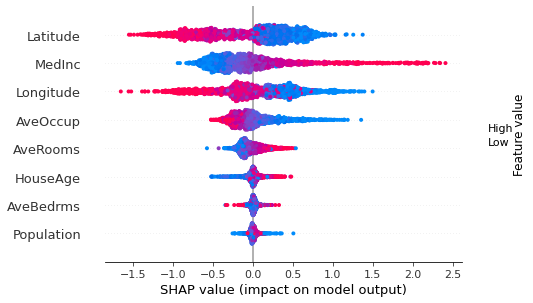

In [14]:
shap.summary_plot(shap_values)

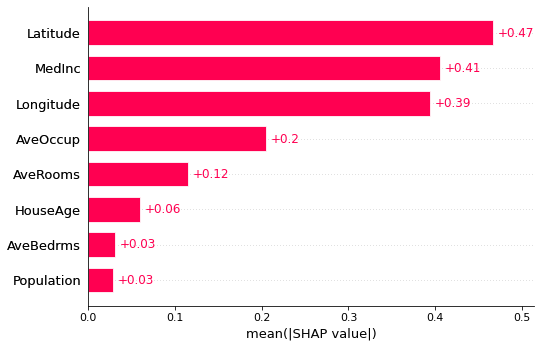

In [15]:
shap.plots.bar(shap_values)

---

In [6]:
model = results['model']
X_train, y_train = results['train']
X_test, y_test = results['test']
feature_names = X_train.columns

explainer = shap.TreeExplainer(model)
train_sv = explainer(X_train)
test_sv = explainer(X_test)
train_siv = explainer.shap_interaction_values(X_train)
test_siv = explainer.shap_interaction_values(X_test)

tree_builder = TreeBuilder()
# magnitude: whether to absolute the shap interaction values to store into values(not related with scores) 
# = only look at the size of values
magnitude = False 

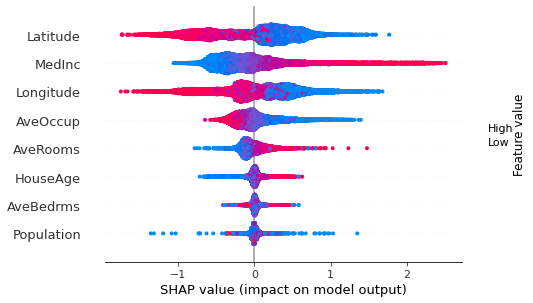

In [9]:
shap.summary_plot(train_sv)

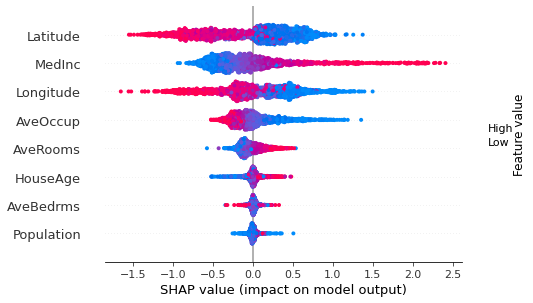

In [10]:
shap.summary_plot(test_sv)

## Interpretations between Trainset & Testset

In [25]:
import scipy.stats as stats

In [13]:
top_n = 1
nodes = tree_builder.build('base', 
    shap_interactions=train_siv, feature_names=feature_names, top_n=top_n, magnitude=magnitude)
tree_builder

Population+AveOccup+HouseAge+AveBedrms+AveRooms+MedInc+Latitude+Longitude(v=0.0000, s=0.6807)
├── Population(v=0.0045, s=0.0045)
└── AveOccup+HouseAge+AveBedrms+AveRooms+MedInc+Latitude+Longitude(v=0.0024, s=0.6682)
    ├── AveOccup(v=0.0138, s=0.0138)
    └── HouseAge+AveBedrms+AveRooms+MedInc+Latitude+Longitude(v=-0.0079, s=0.6301)
        ├── HouseAge(v=0.0125, s=0.0125)
        └── AveBedrms+AveRooms+MedInc+Latitude+Longitude(v=-0.0138, s=0.5981)
            ├── AveBedrms(v=0.0155, s=0.0155)
            └── AveRooms+MedInc+Latitude+Longitude(v=-0.0120, s=0.5601)
                ├── AveRooms(v=-0.0259, s=0.0259)
                └── MedInc+Latitude+Longitude(v=0.0037, s=0.5145)
                    ├── MedInc(v=0.0212, s=0.0212)
                    └── Latitude+Longitude(v=0.0025, s=0.4732)
                        ├── Latitude(v=0.0922, s=0.0922)
                        └── Longitude(v=0.1456, s=0.1456)

In [17]:
tree_builder.levels

{0: ['Population+AveOccup+HouseAge+AveBedrms+AveRooms+MedInc+Latitude+Longitude'],
 1: ['Population',
  'AveOccup+HouseAge+AveBedrms+AveRooms+MedInc+Latitude+Longitude'],
 2: ['AveOccup', 'HouseAge+AveBedrms+AveRooms+MedInc+Latitude+Longitude'],
 3: ['HouseAge', 'AveBedrms+AveRooms+MedInc+Latitude+Longitude'],
 4: ['AveBedrms', 'AveRooms+MedInc+Latitude+Longitude'],
 5: ['AveRooms', 'MedInc+Latitude+Longitude'],
 6: ['MedInc', 'Latitude+Longitude'],
 7: ['Latitude', 'Longitude']}

In [48]:
top_n = 2
nodes = tree_builder.build('base', 
    shap_interactions=test_siv, feature_names=feature_names, top_n=top_n, magnitude=magnitude)
tree_builder

Latitude+Longitude+AveRooms+AveBedrms+HouseAge+AveOccup+MedInc+Population(v=-0.0280, s=0.6874)
├── Latitude+Longitude+AveRooms+AveBedrms+HouseAge+AveOccup(v=-0.0092, s=0.6137)
│   ├── Latitude+Longitude+AveRooms+AveBedrms(v=-0.0326, s=0.5505)
│   │   ├── Latitude+Longitude(v=-0.0122, s=0.4920)
│   │   │   ├── Latitude(v=0.0922, s=0.0922)
│   │   │   └── Longitude(v=0.1477, s=0.1477)
│   │   └── AveRooms+AveBedrms(v=-0.0189, s=0.0493)
│   │       ├── AveRooms(v=-0.0250, s=0.0250)
│   │       └── AveBedrms(v=0.0152, s=0.0152)
│   └── HouseAge+AveOccup(v=0.0217, s=0.0372)
│       ├── HouseAge(v=0.0130, s=0.0130)
│       └── AveOccup(v=0.0165, s=0.0165)
└── MedInc+Population(v=0.0128, s=0.0128)
    ├── MedInc(v=0.0063, s=0.0063)
    └── Population(v=0.0052, s=0.0052)

In [49]:
tree_builder.levels

{0: ['Latitude+Longitude+AveRooms+AveBedrms+HouseAge+AveOccup+MedInc+Population'],
 1: ['Latitude+Longitude+AveRooms+AveBedrms+HouseAge+AveOccup',
  'MedInc+Population'],
 2: ['Latitude+Longitude+AveRooms+AveBedrms',
  'HouseAge+AveOccup',
  'MedInc',
  'Population'],
 3: ['Latitude+Longitude', 'AveRooms+AveBedrms', 'HouseAge', 'AveOccup'],
 4: ['Latitude', 'Longitude', 'AveRooms', 'AveBedrms']}

In [47]:
top_n = 1
nodes = tree_builder.build('abs', 
    shap_interactions=test_siv, feature_names=feature_names, top_n=top_n, magnitude=magnitude)
tree_builder

Population+AveBedrms+HouseAge+AveRooms+AveOccup+MedInc+Latitude+Longitude(v=-0.0280, s=3.1610)
├── Population(v=0.0052, s=0.0217)
└── AveBedrms+HouseAge+AveRooms+AveOccup+MedInc+Latitude+Longitude(v=-0.0266, s=3.0024)
    ├── AveBedrms(v=0.0152, s=0.0240)
    └── HouseAge+AveRooms+AveOccup+MedInc+Latitude+Longitude(v=-0.0263, s=2.8337)
        ├── HouseAge(v=0.0130, s=0.0587)
        └── AveRooms+AveOccup+MedInc+Latitude+Longitude(v=-0.0258, s=2.5537)
            ├── AveRooms(v=-0.0250, s=0.1082)
            └── AveOccup+MedInc+Latitude+Longitude(v=-0.0143, s=2.2535)
                ├── AveOccup(v=0.0165, s=0.2220)
                └── MedInc+Latitude+Longitude(v=-0.0285, s=1.8104)
                    ├── MedInc(v=0.0063, s=0.4452)
                    └── Latitude+Longitude(v=-0.0122, s=1.1855)
                        ├── Latitude(v=0.0922, s=0.3476)
                        └── Longitude(v=0.1477, s=0.4149)

In [16]:
tree_builder.levels

{0: ['Population+AveOccup+HouseAge+AveBedrms+AveRooms+MedInc+Latitude+Longitude'],
 1: ['Population',
  'AveOccup+HouseAge+AveBedrms+AveRooms+MedInc+Latitude+Longitude'],
 2: ['AveOccup', 'HouseAge+AveBedrms+AveRooms+MedInc+Latitude+Longitude'],
 3: ['HouseAge', 'AveBedrms+AveRooms+MedInc+Latitude+Longitude'],
 4: ['AveBedrms', 'AveRooms+MedInc+Latitude+Longitude'],
 5: ['AveRooms', 'MedInc+Latitude+Longitude'],
 6: ['MedInc', 'Latitude+Longitude'],
 7: ['Latitude', 'Longitude']}

In [22]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000
mean,3.875129,28.663437,5.425682,1.095703,1426.969692,3.087023,35.628788,-119.569507
std,1.906943,12.580786,2.519066,0.483814,1136.535080,10.943855,2.136983,2.005468
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.562500,18.000000,4.437713,1.005576,788.000000,2.430165,33.930000,-121.800000
50%,3.538500,29.000000,5.229575,1.048744,1166.500000,2.820312,34.250000,-118.490000
75%,4.745350,37.000000,6.049193,1.099639,1724.000000,3.282273,37.720000,-118.007500
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [23]:
X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000
mean,3.830553,28.423934,5.458860,1.105428,1412.040213,2.923346,35.659525,-119.571478
std,1.834444,12.629438,2.026123,0.373115,1095.299865,0.877843,2.126973,1.986505
min,0.536000,1.000000,1.784530,0.545455,8.000000,1.089268,32.550000,-124.170000
25%,2.582800,18.000000,4.468819,1.008547,779.750000,2.428571,33.940000,-121.780000
50%,3.508600,28.000000,5.225560,1.049011,1164.000000,2.809053,34.285000,-118.520000
75%,4.722200,37.000000,6.068082,1.098482,1729.500000,3.281516,37.670000,-118.027500
max,15.000100,52.000000,34.571429,7.022321,16122.000000,18.444444,41.740000,-114.580000


In [36]:
stats.ttest_1samp(X_train['AveOccup'], 20)

Ttest_1sampResult(statistic=-210.6327176935065, pvalue=0.0)

In [46]:
comment_dict = {
    True: ('has differences', 'Reject H0, tase H1'), 
    False: ('has no differences', 'Cannot reject H0')
}
alpha = 0.05
c = 'AveOccup'
statistic, pvalue = stats.ttest_ind(X_train[c], X_test[c])
res = pvalue < alpha
# T-Test: see if mean is similar
print(f'Test for column: {c} between Trainset and Testset(alpha = {int(100 - alpha*100):d}%)')
print(f'  H0: Mean of column "{c}" in Trainset is same to Testset')
print(f'  H1: Mean of column "{c}" in Trainset is not same to Testset')
print(f'  F={statistic:.4f}, p={pvalue:.4f}')
print(f'  p < 0.05? {res} = {comment_dict[res][0]}, So, {comment_dict[res][1]}')

Test for column: AveOccup between Trainset and Testset(alpha = 95%)
  H0: Mean of column "AveOccup" in Trainset is same to Testset
  H1: Mean of column "AveOccup" in Trainset is not same to Testset
  F=0.6792, p=0.4970
  p < 0.05? False = has no differences, So, Cannot reject H0


In [41]:
stats.ttest_ind(X_train[c], X_test[c])

Ttest_indResult(statistic=0.6792137543302748, pvalue=0.4970100506209739)

In [21]:
X_train.describe() - X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.044576,0.239503,-0.033179,-0.009725,14.929479,0.163677,-0.030738,0.001970
std,0.072499,-0.048652,0.492943,0.110699,41.235215,10.066012,0.010010,0.018963
min,-0.036100,0.000000,-0.938377,-0.212121,-5.000000,-0.396960,-0.010000,-0.180000
25%,-0.020300,0.000000,-0.031106,-0.002971,8.250000,0.001594,-0.010000,-0.020000
50%,0.029900,1.000000,0.004015,-0.000266,2.500000,0.011260,-0.035000,0.030000
75%,0.023150,0.000000,-0.018889,0.001157,-5.500000,0.000757,0.050000,0.020000
max,0.000000,0.000000,107.337662,27.044345,19560.000000,1224.888889,0.210000,0.270000


In [20]:
X_train.describe() / X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1.011637,1.008426,0.993922,0.991202,1.010573,1.055989,0.999138,0.999984
std,1.039521,0.996148,1.243294,1.296688,1.037647,12.466759,1.004706,1.009546
min,0.932649,1.000000,0.474161,0.611111,0.375000,0.635572,0.999693,1.001450
25%,0.992140,1.000000,0.993039,0.997054,1.010580,1.000656,0.999705,1.000164
50%,1.008522,1.035714,1.000768,0.999746,1.002148,1.004008,0.998979,0.999747
75%,1.004902,1.000000,0.996887,1.001053,0.996820,1.000231,1.001327,0.999831
max,1.000000,1.000000,4.104808,4.851197,2.213249,67.409639,1.005031,0.997644
